In [9]:
#########Importing libraries##########
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import  Image
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

############Visualization#############
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
############Machine Learning ##########
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression



In [7]:
########Bring in the DATA!###########

telcom = pd.read_csv("db/telemarker_db.csv")
telcom.head()
# print(telcom.dtypes)
#######Data Cleaning Process#########

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
print("Percentage of null: " + str(round(telcom['TotalCharges'].isnull().sum()/telcom['TotalCharges'].count()*100,4))+"%")

#Dropping null values from total charges column which contain .16% missing data
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)
telcom["MonthlyCharges"] = telcom["MonthlyCharges"].astype(float)

#replace 'No phone service' to No
telcom["MultipleLines"] = telcom["MultipleLines"].replace("No phone service","No")

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

#Change types of columns to boolean
YesNoColumns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity",
                "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                "PaperlessBilling","Churn"]
for i in YesNoColumns :
    telcom[i]  = telcom[i].replace({'Yes':1,'No':0})
BoolColumns = YesNoColumns.copy()
BoolColumns.append("SeniorCitizen")
telcom[BoolColumns] = telcom[BoolColumns].astype('bool')
telcom.head() 

#Separating churn and non churn customers
# churn     = telcom[telcom["Churn"] == "Yes"]
# not_churn = telcom[telcom["Churn"] == "No"]

#     #Separating catagorical and numerical columns
# Id_col     = ['customerID']
# target_col = ["Churn"]
# cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
# cat_cols   = [x for x in cat_cols if x not in target_col]
# num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

Percentage of null: 0.1564%


customerID  gender       City State           Phone  SeniorCitizen  \
0  7590-VHVEG  Female  Sujzojpab    CA  (461) 230-8635          False   
1  5575-GNVDE    Male     Bozuto    WY  (500) 288-7672          False   
2  3668-QPYBK    Male   Cefzizof    NY  (368) 757-6896          False   
3  7795-CFOCW    Male   Zavictej    NV  (865) 723-2538          False   
4  9237-HQITU  Female    Socgimo    HI  (206) 668-9076          False   

   Partner  Dependents  tenure  PhoneService          ...           \
0     True       False       1         False          ...            
1    False       False      34          True          ...            
2    False       False       2          True          ...            
3    False       False      45         False          ...            
4    False       False       2          True          ...            

   StreamingTV StreamingMovies        Contract  PaperlessBilling  \
0        False           False  Month-to-month              True   
1        False           False        One year             False   
2        False           False  Month-to-month              True   
3        False           False        One year             False   
4        False           False  Month-to-month              True   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0           Electronic check           29.85         29.85  False   
1               Mailed check           56.95       1889.50  False   
2               Mailed check           53.85        108.15   True   
3  Bank transfer (automatic)           42.30       1840.75  False   
4           Electronic check           70.70        151.65   True   

               Name               Address  
0  Margaret Gregory        1927 Gusta Way  
1      Allie Valdez        525 Ahev Grove  
2    Bertha Padilla  985 Utomez Extension  
3         Ian Perez    1030 Gagicu Avenue  
4    Gilbert Murray       1905 Ukiij Path  

[5 rows x 26 columns]

In [18]:
X = telcom.MonthlyCharges.values.reshape(-1, 1)
y = telcom.Churn
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

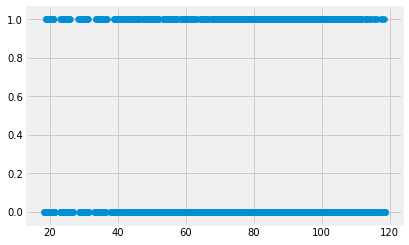

In [14]:
plt.scatter(X, y)


In [19]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [0.00283193]
y-axis intercept:  0.08228129090054523


In [ ]:
###Rafael###